<a href="https://colab.research.google.com/github/hub-naveen/portfolio/blob/main/MACHINE_LEARNING_LAB_EXPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CANDIDATE ELIMINATION ALGORITHM**

In [15]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("data2.csv")

# Extract concepts and target
concepts = np.array(data.iloc[:, :-1])
target = np.array(data.iloc[:, -1])

# Function to implement the Candidate Elimination Algorithm
def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for _ in range(len(specific_h))] for _ in range(len(specific_h))]

    for i, val in enumerate(target):
        if val == "yes":
            for x in range(len(specific_h)):
                if concepts[i][x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        elif val == "no":
            for x in range(len(specific_h)):
                if concepts[i][x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

    # Remove empty rows from general_h
    indices = [i for i, val in enumerate(general_h) if val != ['?' for _ in range(len(specific_h))]]
    general_h = [general_h[i] for i in indices]
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

# Output
print("Final Specific_h:\n", s_final)
print("Final General_h:\n", g_final)


Final Specific_h:
 ['Sunny' 'Warm' '?' 'Strong' '?' '?']
Final General_h:
 [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


# **ID3 Algorithm**

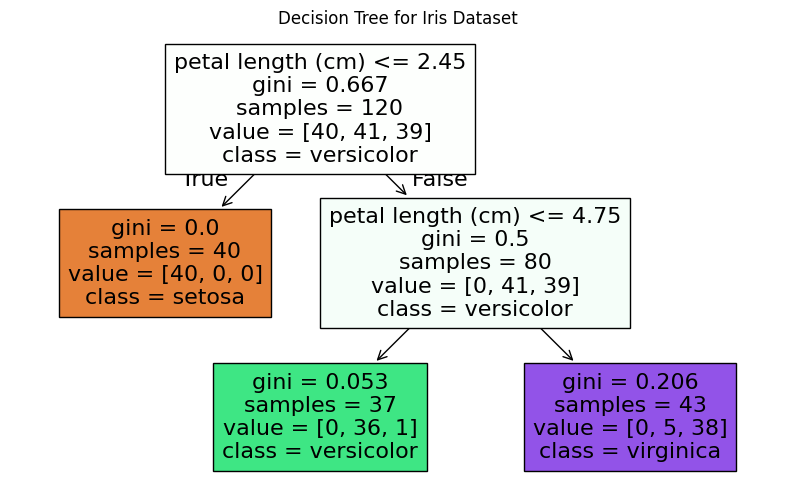

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- class: 2



In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=2)

clf.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()
r = export_text(clf, feature_names=iris.feature_names)
print(r)


# **BACK PROPAGATION ALGORITHM**

In [17]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
w1 = np.random.rand(2, 4)
w2 = np.random.rand(4, 1)
b1 = np.random.rand(1, 4)
b2 = np.random.rand(1, 1)
for i in range(10000):

    h = sigmoid(np.dot(X, w1) + b1)
    o = sigmoid(np.dot(h, w2) + b2)

    o_error = y - o
    o_delta = o_error * sigmoid_derivative(o)

    h_error = o_delta.dot(w2.T)
    h_delta = h_error * sigmoid_derivative(h)

    w2 += h.T.dot(o_delta)
    w1 += X.T.dot(h_delta)
    b2 += np.sum(o_delta, axis=0, keepdims=True)
    b1 += np.sum(h_delta, axis=0, keepdims=True)
print(o)


[[0.00781706]
 [0.98636544]
 [0.99363569]
 [0.01282556]]


# **NAIVE BAYESIAN CLASSIFICATION**

In [21]:
import numpy as np

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([1, 1, 0, 0])


class_1 = x[y == 1]
class_0 = x[y == 0]


P_class_1 = len(class_1) / len(x)
P_class_0 = len(class_0) / len(x)

P_feature_given_class_1 = np.mean(class_1, axis=0)
P_feature_given_class_0 = np.mean(class_0, axis=0)

x_new = np.array([1, 0])
P_1_given_x = P_class_1 * np.prod(P_feature_given_class_1 ** x_new * (1 - P_feature_given_class_1) ** (1 - x_new))

P_0_given_x = P_class_0 * np.prod(P_feature_given_class_0 ** x_new * (1 - P_feature_given_class_0) ** (1 - x_new))

print(f"class is :" ,1 if P_1_given_x > P_0_given_x else 0)


class is : 1


# **NAIVE BAYESIAN CLASSIFER MODEL**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Sample texts and labels
texts = [
    "Love this movie", "This film is terrible", "Amazing acting",
    "Worst movie ever", "Great direction", "Net worth written", "Fantastic plot",
    "Awful storyline"
]
labels = [1, 0, 1, 0, 1, 1, 0, 0]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Transform the texts into a tf-idf matrix
X = vectorizer.fit_transform(texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print(f"Accuracy = {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision = {precision_score(y_test, y_pred):.2f}")
print(f"Recall = {recall_score(y_test, y_pred):.2f}")


Accuracy = 0.33
Precision = 0.00
Recall = 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Expectation Maximization**

In [14]:

import pandas as pd
from sklearn.mixture import GaussianMixture
df = pd.read_csv("data.csv")
X = df.iloc[:, :].values
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)
df['Cluster'] = labels
df.to_csv("Clustered-data.csv", index=False)

print("Clustering complete. Results saved to 'Clustered-data.csv'")


Clustering complete. Results saved to 'Clustered-data.csv'


# **BAYESIAN NETWORK**

In [2]:
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [9]:
pip install --upgrade pgmpy


In [10]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

model = DiscreteBayesianNetwork([('covid', 'Fever'), ('covid', 'cough'), ('covid', 'Test Result')])

cpd_covid = TabularCPD(variable='covid', variable_card=2, values=[[0.95], [0.05]])
cpd_fever = TabularCPD(variable='Fever', variable_card=2,
                       values=[[0.8, 0.2], [0.2, 0.8]],
                       evidence=['covid'], evidence_card=[2])
cpd_cough = TabularCPD(variable='cough', variable_card=2,
                       values=[[0.9, 0.1], [0.1, 0.9]],
                       evidence=['covid'], evidence_card=[2])
cpd_test = TabularCPD(variable='Test Result', variable_card=2,
                      values=[[0.1, 0.9], [0.9, 0.1]],
                      evidence=['covid'], evidence_card=[2])

model.add_cpds(cpd_covid, cpd_fever, cpd_cough, cpd_test)
assert model.check_model(), "Model is incorrect"

inference = VariableElimination(model)
query_result = inference.query(variables=['covid'], evidence={'Fever': 1, 'cough': 1})
print(query_result)


+----------+--------------+
| covid    |   phi(covid) |
+==========+==============+
| covid(0) |       0.3455 |
+----------+--------------+
| covid(1) |       0.6545 |
+----------+--------------+


# **KNN Algorithm**

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Print results
print("Correct and Wrong Predictions:\n")
for i in range(len(y_test)):
    actual = iris.target_names[y_test[i]]
    predicted = iris.target_names[predictions[i]]
    status = "✅ Correct" if y_test[i] == predictions[i] else "❌ Wrong"
    print(f"Sample {i+1}: Predicted = {predicted}, Actual = {actual} --> {status}")

Correct and Wrong Predictions:

Sample 1: Predicted = versicolor, Actual = versicolor --> ✅ Correct
Sample 2: Predicted = virginica, Actual = virginica --> ✅ Correct
Sample 3: Predicted = setosa, Actual = setosa --> ✅ Correct
Sample 4: Predicted = versicolor, Actual = versicolor --> ✅ Correct
Sample 5: Predicted = setosa, Actual = setosa --> ✅ Correct
Sample 6: Predicted = versicolor, Actual = versicolor --> ✅ Correct
Sample 7: Predicted = virginica, Actual = versicolor --> ❌ Wrong
Sample 8: Predicted = versicolor, Actual = versicolor --> ✅ Correct
Sample 9: Predicted = setosa, Actual = setosa --> ✅ Correct
Sample 10: Predicted = versicolor, Actual = versicolor --> ✅ Correct
Sample 11: Predicted = versicolor, Actual = versicolor --> ✅ Correct
Sample 12: Predicted = virginica, Actual = virginica --> ✅ Correct
Sample 13: Predicted = versicolor, Actual = versicolor --> ✅ Correct
Sample 14: Predicted = setosa, Actual = setosa --> ✅ Correct
Sample 15: Predicted = setosa, Actual = setosa -->

# **LOCALLY WEIGHTED REGRESSION ALGORITHM**

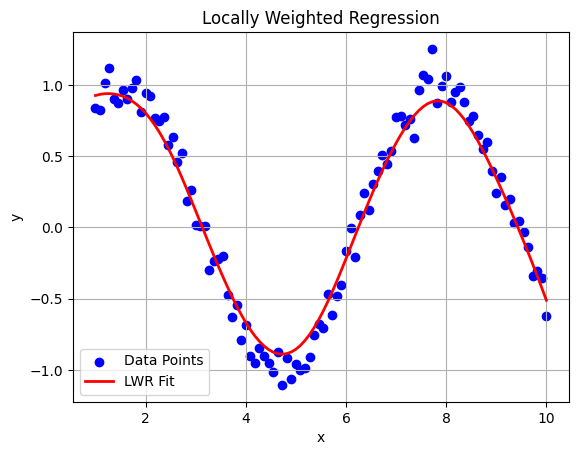

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)
X = np.column_stack((np.ones_like(x), x))
x_query = np.linspace(1, 10, 100)
X_query = np.column_stack((np.ones_like(x_query), x_query))
tau = 0.5
def predict(x_q, X, y, tau):
    m = X.shape[0]
    weights = np.exp(-((X[:, 1] - x_q[1]) ** 2) / (2 * tau ** 2))
    W = np.diag(weights)
    theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
    return x_q @ theta
y_pred = np.array([predict(X_query[i], X, y, tau) for i in range(len(X_query))])

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_query, y_pred, color='red', linewidth=2, label='LWR Fit')
plt.title('Locally Weighted Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()